In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/wandb_data.csv')
df = df[['batch_size', 'seed' ,'test_r', 'test_mae']]
df.head()

,batch_size,seed,test_r,test_mae
0,128,4,0.644261,0.621138
1,128,3,0.650309,0.610149
2,128,2,0.652207,0.609901
3,128,1,0.628038,0.632175
4,128,0,0.628764,0.624649


In [3]:
summary = df.groupby('batch_size')['test_r'].agg(['mean', 'std']).reset_index()

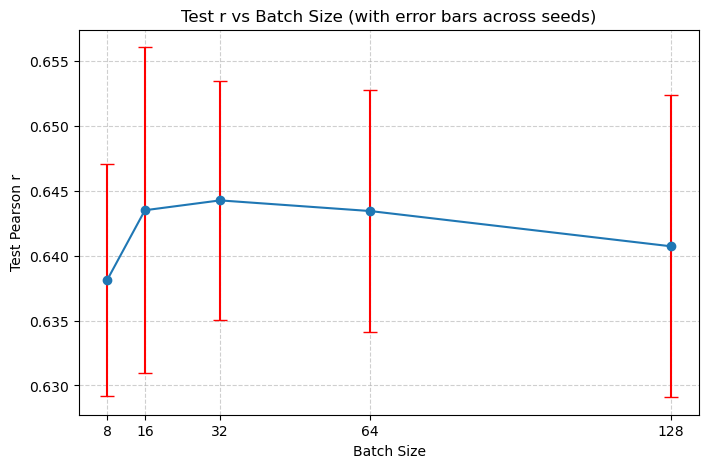

<Figure size 640x480 with 0 Axes>

In [4]:
# Plot
plt.figure(figsize=(8,5))
plt.errorbar(
    summary['batch_size'],
    summary['mean'],
    yerr=summary['std'],
    fmt='o-',            # line + points
    capsize=5,           # little cross bar at top of error bar
    ecolor='red',  # color of error bar
)

plt.xlabel("Batch Size")
plt.ylabel("Test Pearson r")
plt.xticks(summary['batch_size'])
plt.title("Test r vs Batch Size (with error bars across seeds)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.tight_layout()

In [ ]:
df2 = pd.read_csv('../data/week6_data.csv')


,Name,State,Notes,User,Tags,Created,Runtime,Sweep,batch_size,epochs,...,seed,parameters.seeds,program,epoch,test_mae,test_r,train_mae,train_r,val_mae,val_r
0,bs128-seed4,finished,-,NaN,bs128,2025-11-14T23:56:57.000Z,524,NaN,128.0,10.0,...,4.0,NaN,NaN,10,0.621138,0.644261,0.503618,0.747903,0.569245,0.667614
1,bs128-seed3,finished,-,NaN,bs128,2025-11-14T23:48:15.000Z,521,NaN,128.0,10.0,...,3.0,NaN,NaN,10,0.610149,0.650309,0.497975,0.753809,0.559317,0.678418
2,bs128-seed2,finished,-,NaN,bs128,2025-11-14T23:39:33.000Z,522,NaN,128.0,10.0,...,2.0,NaN,NaN,10,0.609901,0.652207,0.496243,0.755706,0.574668,0.673250
3,bs128-seed1,finished,-,NaN,bs128,2025-11-14T23:30:50.000Z,523,NaN,128.0,10.0,...,1.0,NaN,NaN,10,0.632175,0.628038,0.518504,0.733123,0.600599,0.650084
4,bs128-seed0,finished,-,NaN,bs128,2025-11-14T23:22:06.000Z,524,NaN,128.0,10.0,...,0.0,NaN,NaN,10,0.624649,0.628764,0.520542,0.729090,0.585081,0.657551


In [10]:
# create new column for batch size tags
def helper(name): 
    if 'bs8' in name:
        return 8 
    elif 'bs16' in name:
        return 16
    elif 'bs32' in name:
        return 32
    elif 'bs64' in name:
        return 64
    elif 'bs128' in name:
        return 128
    else:
        return np.nan
df2['batch_size_tag'] = df2['Tags'].apply(helper)   

In [11]:
summary2 = df2.groupby('batch_size_tag')['Runtime'].agg(['mean', 'std']).reset_index()

In [12]:
summary2

,batch_size_tag,mean,std
0,8,1649.2,71.566053
1,16,951.4,162.170589
2,32,656.2,4.494441
3,64,573.6,5.079370
4,128,522.8,1.303840


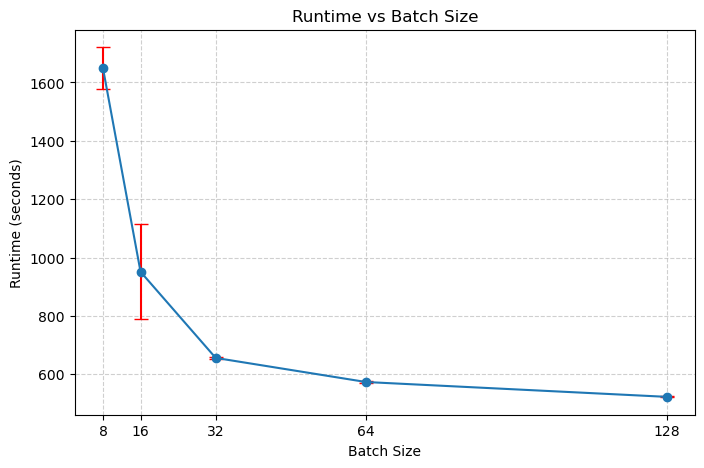

In [15]:
# Plot
plt.figure(figsize=(8,5))
plt.errorbar(
    summary2['batch_size_tag'],
    summary2['mean'],
    yerr=summary2['std'],
    fmt='o-',            # line + points
    capsize=5,           # little cross bar at top of error bar
    ecolor='red',  # color of error bar
)

plt.xlabel("Batch Size")
plt.ylabel("Runtime (seconds)")
plt.xticks(summary2['batch_size_tag'])
plt.title("Runtime vs Batch Size")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()